SkillMinds AI is an AI-driven learning and upskilling platform designed to empower professionals and organizations through personalized learning paths, AI mentorship, and certification-based career advancement.

The platform operates on a freemium business model offering users limited access to foundational courses and chatbot-based guidance for free, while providing paid access to advanced certifications, AI mentor sessions, and career intelligence dashboards.

This data analytics project investigates user engagement behavior, course difficulty, and skill progression patterns to identify the key drivers that influence the conversion of free users into paid subscribers.

Using synthetic data representing thousands of user journeys, this analysis reveals how factors such as industry, skill domain, learning duration, and AI chatbot interaction frequency correlate with higher conversion rates. The outcome provides data-backed recommendations for optimizing SkillMind’s marketing, course design, and pricing strategies to improve monetization and retention.

Company Name: SkillMinds AI

Business: A platform offering free and paid subscription for upskilling.


Problem statement - Analyzing how users progress from free trial courses to full membership subscriptions, and which topics drive the highest engagement.

**Platform User Analytics Dashboard**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [ ]:
data = pd.read_csv('SkillMinds_AI_synthetic_50000.csv')

**EDA**



In [ ]:
data.head()

,user_id,signup_date,initial_plan,final_plan,conversion_date,months_active,monthly_usage_hrs,messages_sent,user_segment,country,satisfaction_score,churned,prompt_category,prompt_count
0,U100000,2025-04-08,Free,Free,NaN,6,0.50,23,Job Seeker,Japan,7,0,Interview Prep,4
1,U100001,2025-10-09,Free,Free,NaN,1,2.12,10,General User,Germany,5,0,General Knowledge,3
2,U100002,2023-03-31,Free,Free,NaN,31,1.58,440,Student,South Korea,5,0,Study Help,61
3,U100003,2024-03-10,Free,Free,NaN,1,1.25,5,General User,France,4,1,General Knowledge,2
4,U100004,2023-10-26,Free,Paid,2023-11-03,24,10.38,1988,Business User,Netherlands,10,0,Business Strategy,169


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             50000 non-null  object 
 1   signup_date         50000 non-null  object 
 2   initial_plan        50000 non-null  object 
 3   final_plan          50000 non-null  object 
 4   conversion_date     7452 non-null   object 
 5   months_active       50000 non-null  int64  
 6   monthly_usage_hrs   50000 non-null  float64
 7   messages_sent       50000 non-null  int64  
 8   user_segment        50000 non-null  object 
 9   country             50000 non-null  object 
 10  satisfaction_score  50000 non-null  int64  
 11  churned             50000 non-null  int64  
 12  prompt_category     50000 non-null  object 
 13  prompt_count        50000 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 5.3+ MB


In [ ]:
missing = data.isnull().sum()
print(missing)

user_id                   0
signup_date               0
initial_plan              0
final_plan                0
conversion_date       42548
months_active             0
monthly_usage_hrs         0
messages_sent             0
user_segment              0
country                   0
satisfaction_score        0
churned                   0
prompt_category           0
prompt_count              0
dtype: int64


In [ ]:
missing_percentage = (missing / len(data) * 100).round(2)
print(missing_percentage)

user_id                0.0
signup_date            0.0
initial_plan           0.0
final_plan             0.0
conversion_date       85.1
months_active          0.0
monthly_usage_hrs      0.0
messages_sent          0.0
user_segment           0.0
country                0.0
satisfaction_score     0.0
churned                0.0
prompt_category        0.0
prompt_count           0.0
dtype: float64


In [ ]:
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percentage})
missing_df

,Missing Count,Missing %
user_id,0,0.0
signup_date,0,0.0
initial_plan,0,0.0
final_plan,0,0.0
conversion_date,42548,85.1
months_active,0,0.0
monthly_usage_hrs,0,0.0
messages_sent,0,0.0
user_segment,0,0.0
country,0,0.0


**We are ignoring the coverison date null values. The null values in coversion date column simply represent that these users haven't opted for paid membership subscription.**

In [ ]:
data.describe()

,months_active,monthly_usage_hrs,messages_sent,satisfaction_score,churned,prompt_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,15.537700,4.235789,504.791580,7.124740,0.115500,144.187820
std,10.655382,4.220527,791.930339,1.760137,0.319628,272.284823
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,5.000000,1.540000,71.000000,6.000000,0.000000,14.000000
50%,15.000000,2.960000,232.000000,7.000000,0.000000,53.000000
75%,25.000000,5.430000,604.000000,8.000000,0.000000,157.000000
max,35.000000,57.680000,22145.000000,10.000000,1.000000,8398.000000


In [ ]:
#Checking for duplicate user_ids
duplicates = data.duplicated().sum()
print(f"dupilicates rows: {duplicates}")

dupilicates rows: 0


In [ ]:
data['monthly_usage_hrs'].describe()

,monthly_usage_hrs
count,50000.000000
mean,4.235789
std,4.220527
min,0.000000
25%,1.540000
50%,2.960000
75%,5.430000
max,57.680000


**Feature engineering**

In [ ]:
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['conversion_date'] = pd.to_datetime(data['conversion_date'])

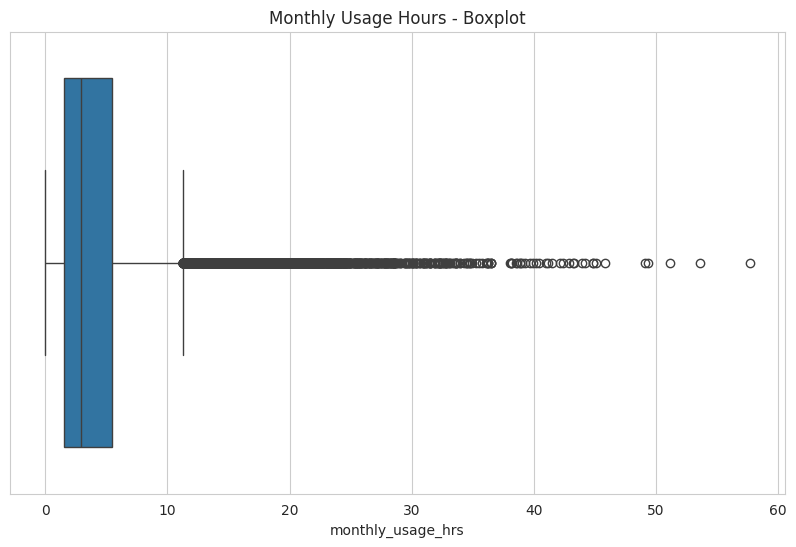

In [ ]:
#Plotting the monthly usage hours to check for outliers.
sns.boxplot(x=data['monthly_usage_hrs'])
plt.title("Monthly Usage Hours - Boxplot")
plt.show()

**Most of the users have low monthly usage as indicated in the boxplot within the dataset. There are high number of outliers indicating that many users with unsually high monthly usage.**

In [ ]:
data['monthly_usage_hrs'].describe()

,monthly_usage_hrs
count,50000.000000
mean,4.235789
std,4.220527
min,0.000000
25%,1.540000
50%,2.960000
75%,5.430000
max,57.680000


In [ ]:
Q1 = data['monthly_usage_hrs'].quantile(0.25)
Q3 = data['monthly_usage_hrs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = data[(data['monthly_usage_hrs'] < Q1 - 1.5*IQR) | (data['monthly_usage_hrs'] > Q3 + 1.5*IQR)]
len(outliers)

3120

**Number of outliers with unsual high monthly usage are 3120.**

In [ ]:
outliers['monthly_usage_hrs'].describe()

,monthly_usage_hrs
count,3120.000000
mean,16.420548
std,5.579782
min,11.270000
25%,12.620000
50%,14.500000
75%,18.222500
max,57.680000


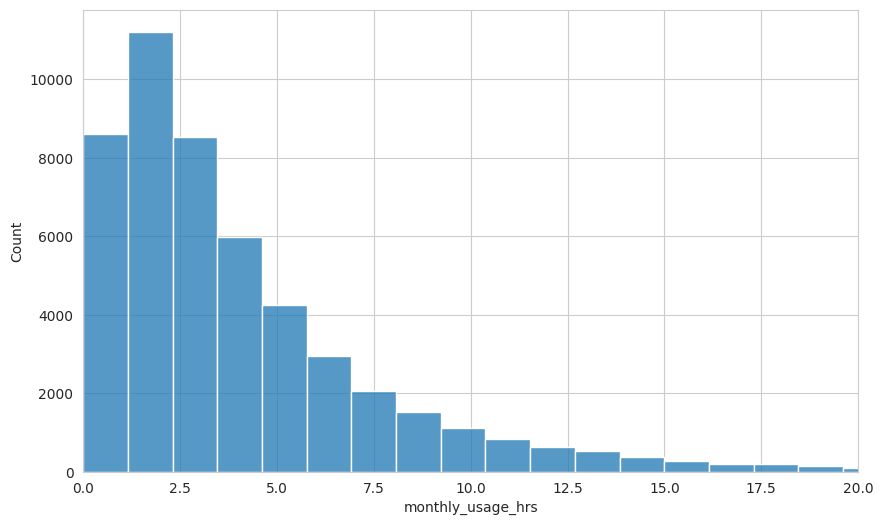

In [ ]:
sns.histplot(data['monthly_usage_hrs'], bins=50)
plt.xlim(0, 20)
plt.show()

**Statistically, most of the users from the outliers are heavy users which fall between 15 to 20 hours monthly usage. This can be considered as realistically possible. Customers, could be using the services for 15 to 20 hours. Since, the outliers are huge in number (3120) they could be converted into paid users using marketing strategies and the company could target them with paid offers for monthly or yearly offers. SkillMinds AI could give weekly offers to General users and students to explore other type of courses and afford monthly or yearly subcriptions.**

In [ ]:
data['messages_sent'].describe()

,messages_sent
count,50000.000000
mean,504.791580
std,791.930339
min,1.000000
25%,71.000000
50%,232.000000
75%,604.000000
max,22145.000000


In [ ]:
Q1 = data['messages_sent'].quantile(0.25)
Q3 = data['messages_sent'].quantile(0.75)
IQR = Q3-Q1
print(IQR)
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(lower_bound)
print(upper_bound)
outliers = data[(data['messages_sent'] < lower_bound) | (data['messages_sent'] > upper_bound)]
len(outliers)

533.0
-728.5
1403.5


4288

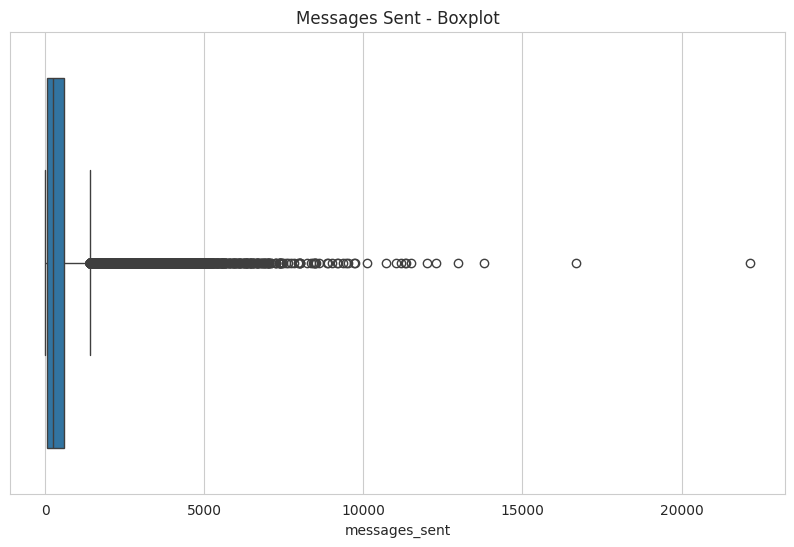

In [ ]:
sns.boxplot(x=data['messages_sent'])
plt.title("Messages Sent - Boxplot")
plt.show()

**Again, the outliers for AI chatbot for queries is 4288 which is on the high end. These are again for heavy users that fall under the high usage outliers.**

In [ ]:
data['satisfaction_score'].describe()

,satisfaction_score
count,50000.000000
mean,7.124740
std,1.760137
min,1.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,10.000000


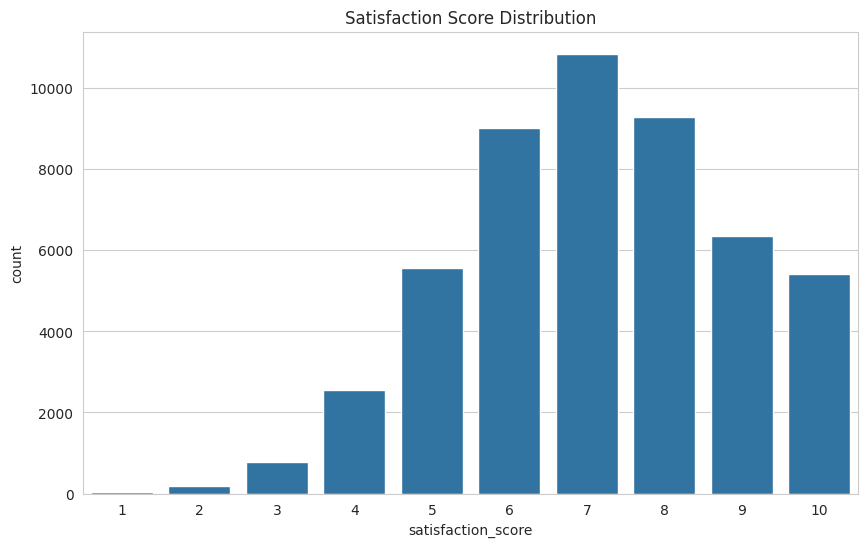

In [ ]:
sns.countplot(x='satisfaction_score', data=data)
plt.title("Satisfaction Score Distribution")
plt.show()

**The satisfaction score is normally distributed, having mean and median both as 7. Both free and paid customers are satisfied with the services offered.**

**Checking for anomalies and value counts for further analysis.**

In [ ]:
data['user_segment'].value_counts()

,count
user_segment,
General User,15006
Student,14854
Job Seeker,9032
Developer,6110
Business User,4998


In [ ]:
data['initial_plan'].value_counts()
data['final_plan'].value_counts()

,count
final_plan,
Free,42548
Paid,7452


In [ ]:
data['country'].value_counts()

,count
country,
India,3450
Indonesia,3409
South Korea,3405
Germany,3383
Australia,3367
Mexico,3360
UK,3334
Italy,3308
USA,3304


In [ ]:
data['converted'] = (np.where(data['final_plan'] == 'Paid', 1,0))

In [ ]:
data['active_days'] = data["months_active"]*30

Text(0.5, 1.0, 'Plan Type Distribution')

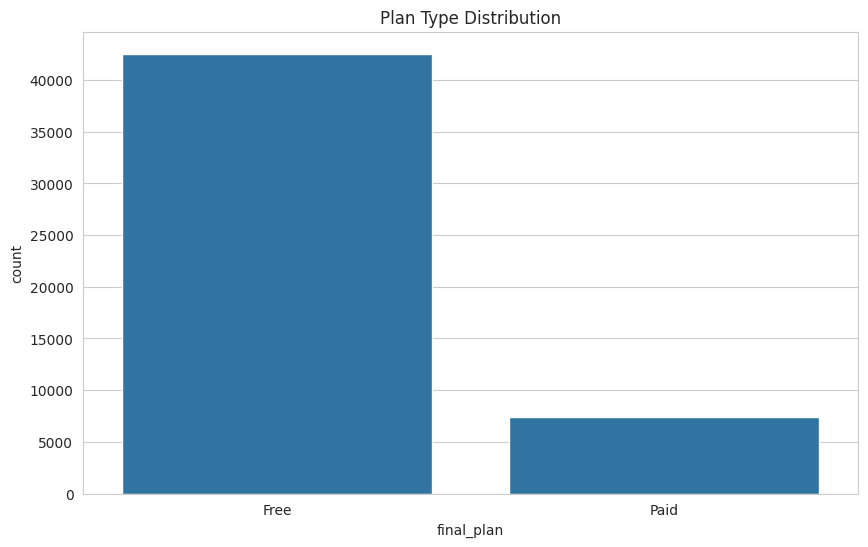

In [ ]:
sns.countplot(x="final_plan", data=data)
plt.title("Plan Type Distribution")

**As visualized above, most of the users are using the free plan. Free plan users are extremeley high, indicating a low conversion rate.**

Text(0.5, 1.0, 'Monthly Usage Distribution')

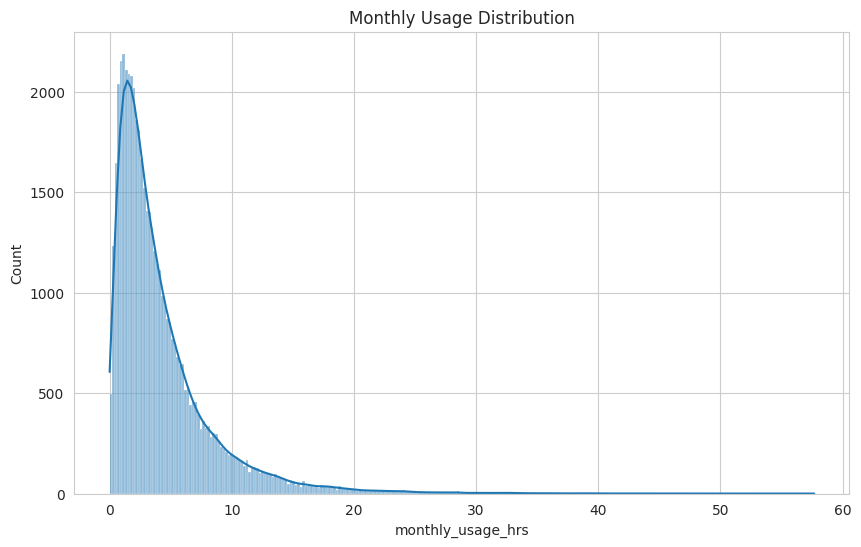

In [ ]:
sns.histplot(data["monthly_usage_hrs"], kde=True)
plt.title("Monthly Usage Distribution")

Text(0.5, 1.0, 'User Segment Distribution')

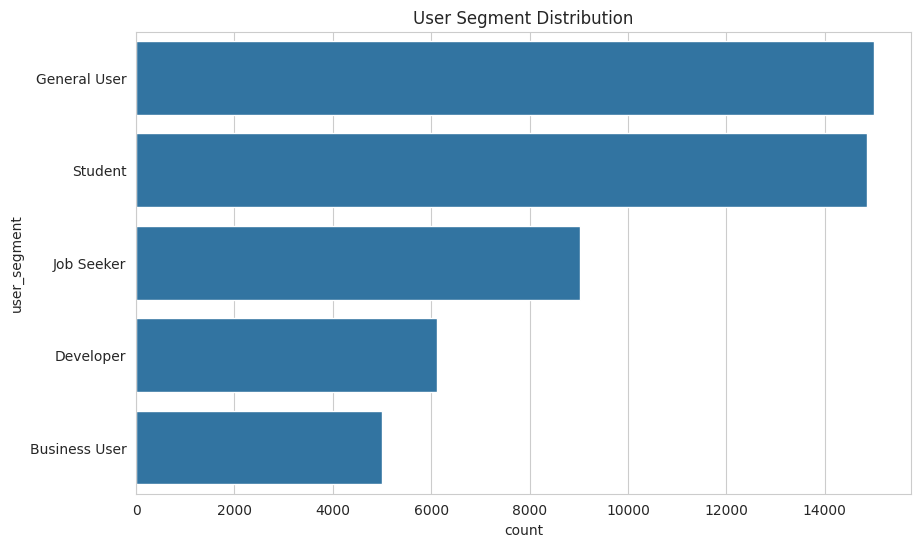

In [ ]:
sns.countplot(y="user_segment", data=data, order=data["user_segment"].value_counts().index)
plt.title("User Segment Distribution")

**Most of the users are general users followed by students and job seekers. The usage by Developers and Business users is marginally less.**

In [ ]:
data.groupby('final_plan')['satisfaction_score'].describe()

,count,mean,std,min,25%,50%,75%,max
final_plan,,,,,,,,
Free,42548.0,6.897363,1.703660,1.0,6.0,7.0,8.0,10.0
Paid,7452.0,8.422974,1.494893,2.0,7.0,9.0,10.0,10.0


<Axes: xlabel='final_plan', ylabel='satisfaction_score'>

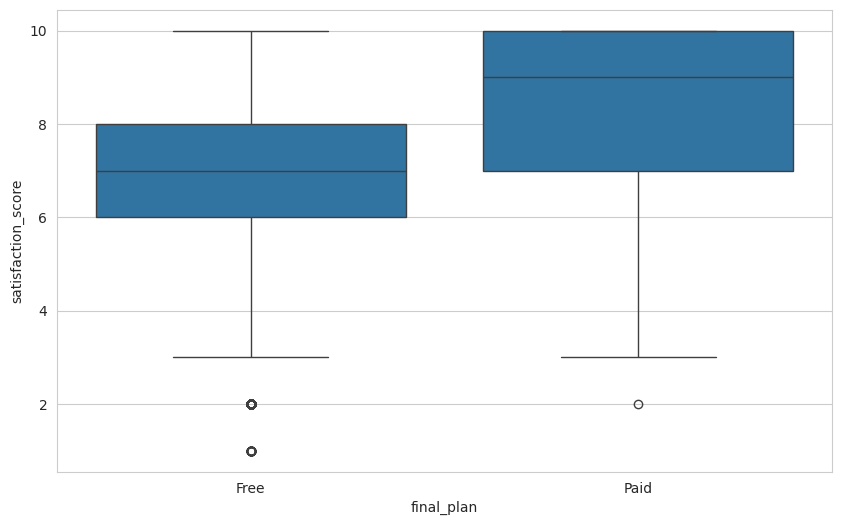

In [ ]:
sns.boxplot(x="final_plan", y="satisfaction_score", data=data)

**The satisfaction score for free users is neutral (median = 7) and for paid users is higher (median = 9) with a slight left skew. This indicates that most paid users are highly satisfied, though a few show lower satisfaction. It may be worth investigating these outliers to understand any specific issues among some paid users.**

<Axes: xlabel='satisfaction_score', ylabel='Count'>

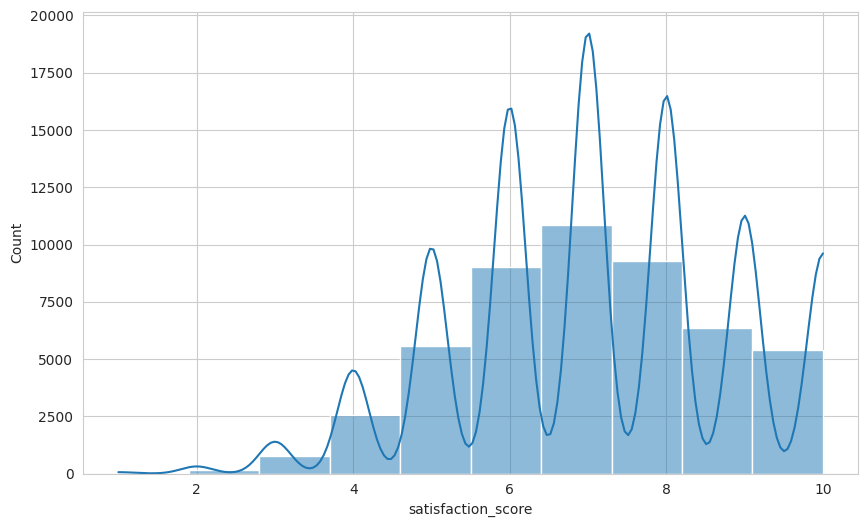

In [ ]:
sns.histplot(data["satisfaction_score"], bins=10, kde=True)

<Axes: xlabel='count', ylabel='country'>

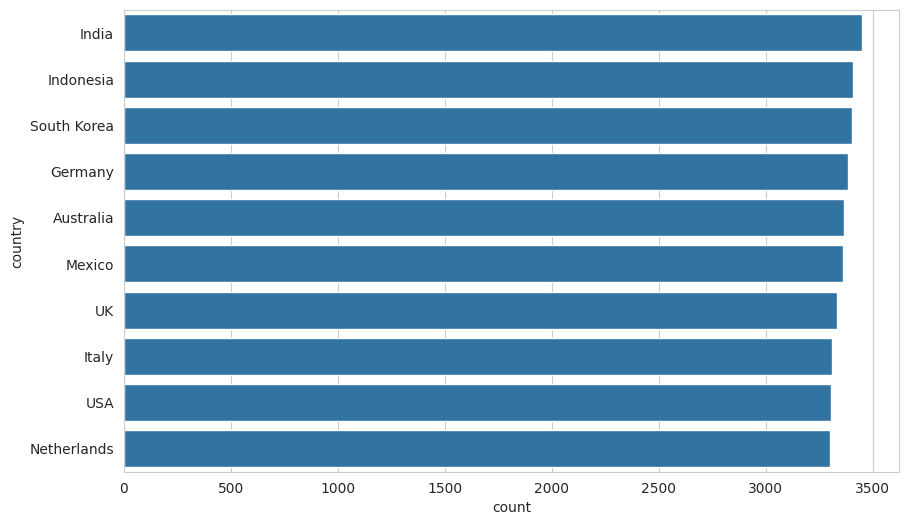

In [ ]:
sns.countplot(y="country", data=data, order=data["country"].value_counts().head(10).index)

<Axes: xlabel='user_segment', ylabel='converted'>

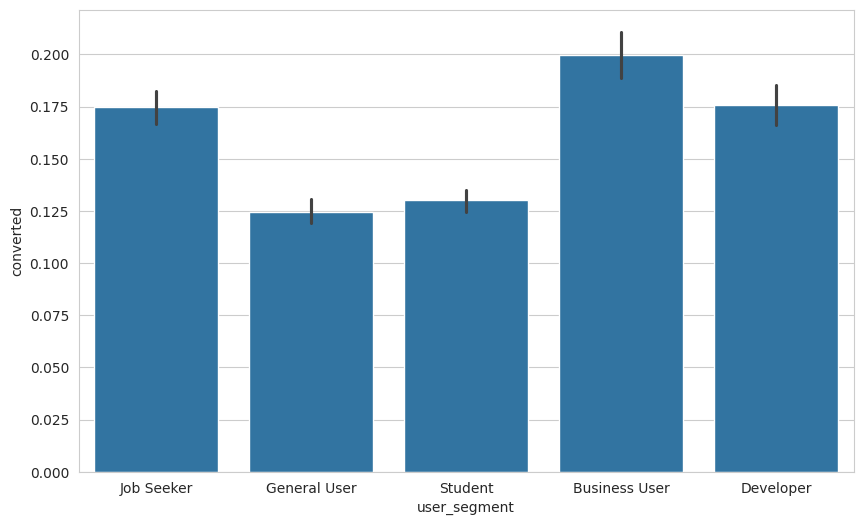

In [ ]:
sns.barplot(x="user_segment", y="converted", data=data)

<Axes: xlabel='monthly_usage_hrs', ylabel='satisfaction_score'>

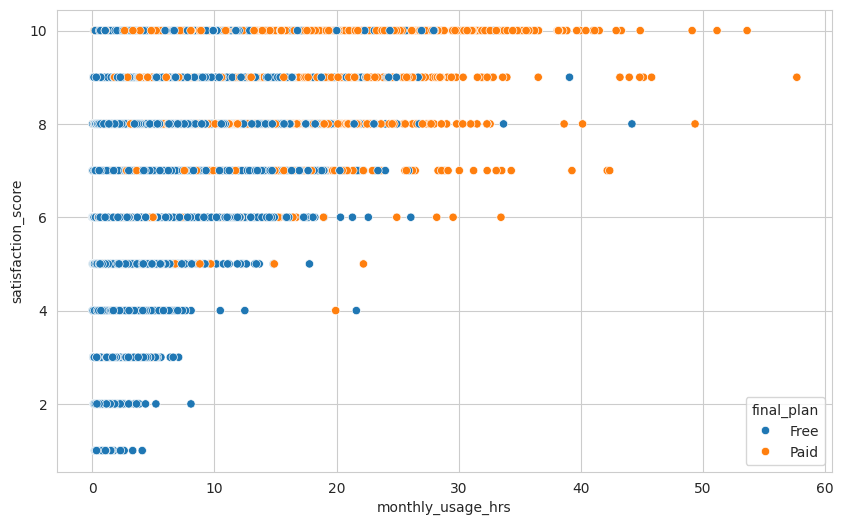

In [ ]:
sns.scatterplot(x="monthly_usage_hrs", y="satisfaction_score", hue="final_plan", data=data)

<Axes: >

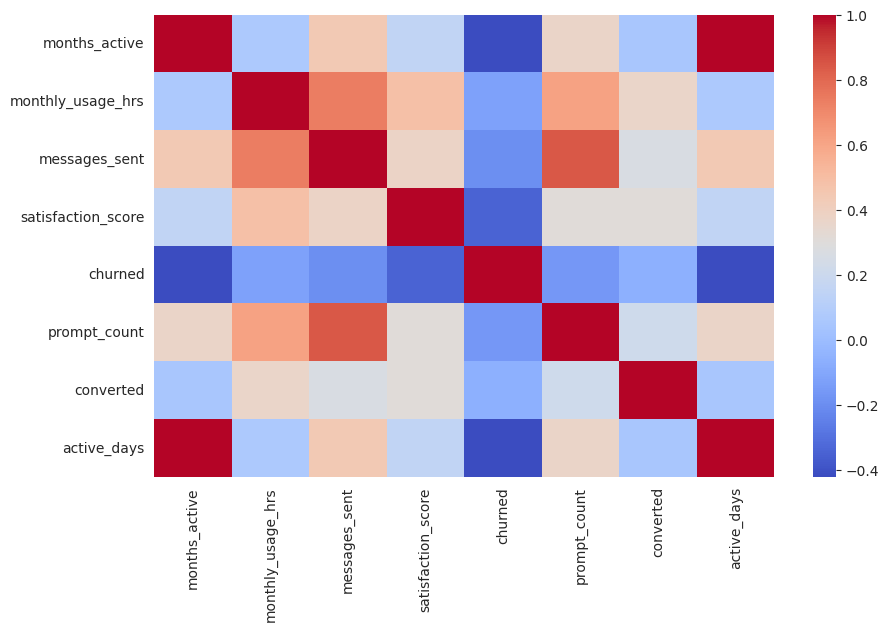

In [ ]:
sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm", annot=False)

In [ ]:
px.scatter(data, x="monthly_usage_hrs", y="satisfaction_score",
           color="user_segment", size="messages_sent",
           hover_data=["country", "final_plan"])

**Freemium to Paid Conversion Analysis**

In [ ]:
conversion_rate = data["converted"].mean() * 100
print(f"Overall Conversion Rate: {conversion_rate:.2f}%")

Overall Conversion Rate: 14.90%


In [ ]:
data['activated'] = ((data['initial_plan'] == 'Free') & (data['final_plan'] != 'Free'))
activation_rate = data['activated'].mean() * 100
print(f"Activation Rate (Free → Paid): {activation_rate:.2f}%")

Activation Rate (Free → Paid): 6.84%


**Overall Conversion Rate: 14.90%**

<Axes: title={'center': 'Conversion Rate by Segment'}, xlabel='user_segment'>

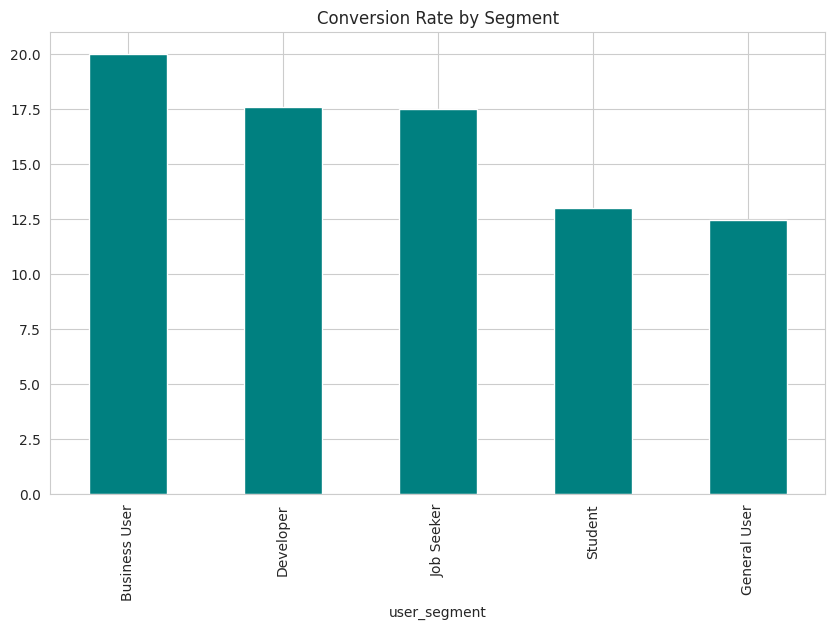

In [ ]:
seg_conv = data.groupby("user_segment")["converted"].mean().sort_values(ascending=False) * 100
seg_conv.plot(kind='bar', color='teal', title="Conversion Rate by Segment")

Although, company's frequent users are General users, students and job seekers. The conversion from free to paid is highest among Business users and developers indicating a high potential for growth. Company could find new customers within these two markets offering advance courses whilst trying to introduce budget-friendly plans for job seekers, students and General users. SkillMinds AI could introduce courses specifically for internship and job preparations for job seekers and students.

In [ ]:
data.groupby('converted')['monthly_usage_hrs'].describe()

,count,mean,std,min,25%,50%,75%,max
converted,,,,,,,,
0,42548.0,3.589372,3.173286,0.00,1.4100,2.65,4.75,44.18
1,7452.0,7.926575,6.783831,0.02,3.1275,6.01,10.63,57.68


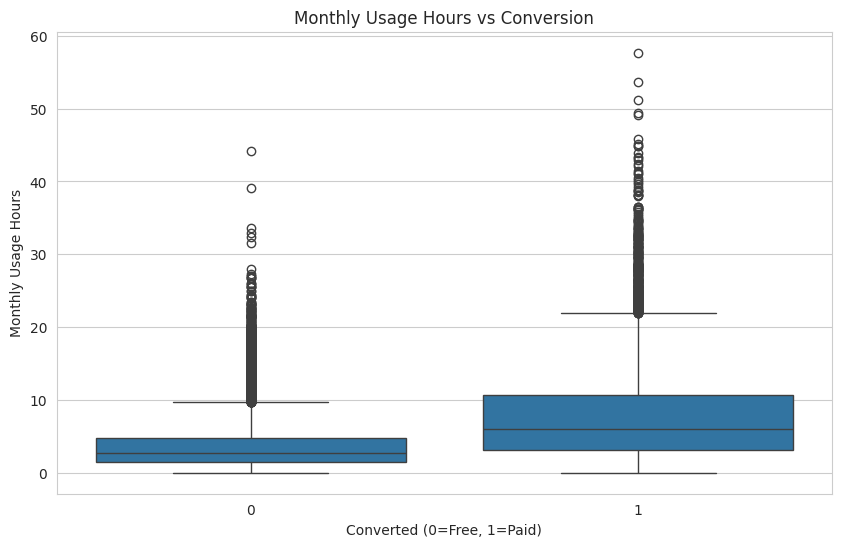

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='converted', y='monthly_usage_hrs', data=data)
plt.title('Monthly Usage Hours vs Conversion')
plt.xlabel('Converted (0=Free, 1=Paid)')
plt.ylabel('Monthly Usage Hours')
plt.show()

As mentioned earlier, that average free users fall between 2 to 3 hours for free users and 5 to 6 hours for paid users. The outliers in this analysis are worth investigating further as they stand statistically significant. company's services in offering courses is widely explored by students and it's worth finding out -


1.   What is attracting these potential prospects.
2.   They could simply add a explore button option for the free users to engage and understand their preferences by offering these services on weekly paid budget-friendly options plans instead of monthly or yearly paid plans.

Company could bring in potential revenue for the company if they implement plans that are budget-friendly to the customers or premium services. Company could survey these outliers to put forward a plan that benefits both the customer and the business.

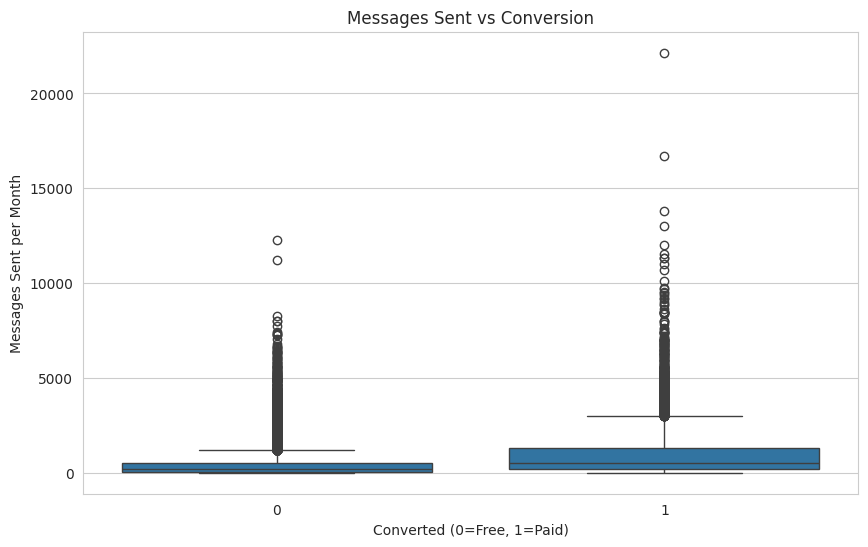

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='converted', y='messages_sent', data=data)
plt.title('Messages Sent vs Conversion')
plt.xlabel('Converted (0=Free, 1=Paid)')
plt.ylabel('Messages Sent per Month')
plt.show()

Each service whether free or paid incurs a computational cost that they optimise their business model to scale and generate revenue. Here, SkillMinds AI is incuring a computational cost. It is important to articulate the cost against the revenue and further asess potential revenue generating prospects.

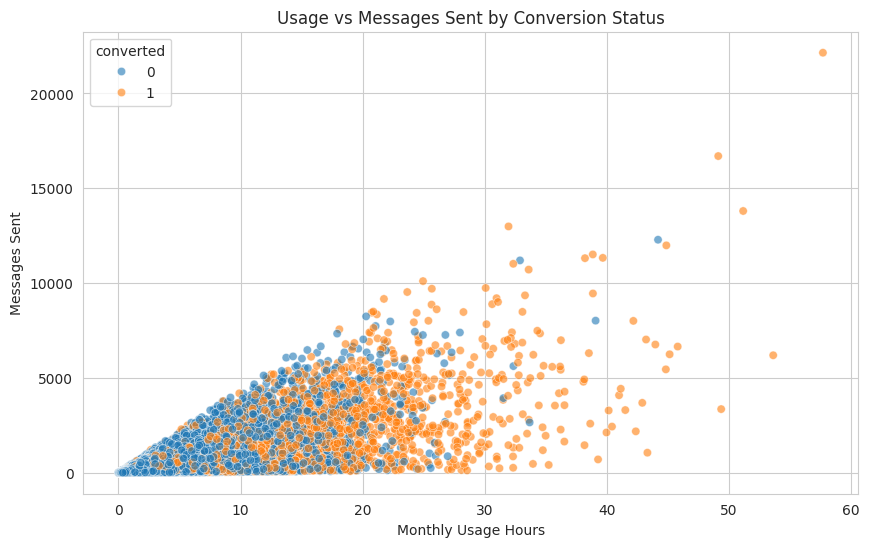

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='monthly_usage_hrs', y='messages_sent', hue='converted', alpha=0.6)
plt.title('Usage vs Messages Sent by Conversion Status')
plt.xlabel('Monthly Usage Hours')
plt.ylabel('Messages Sent')
plt.show()

Usage is heavily concentrated for free users rather than paid users.

In [ ]:
data['days_to_convert'] = (data['conversion_date'] - data['signup_date']).dt.days
converted_users['days_to_convert'].describe()

NameError: name 'converted_users' is not defined

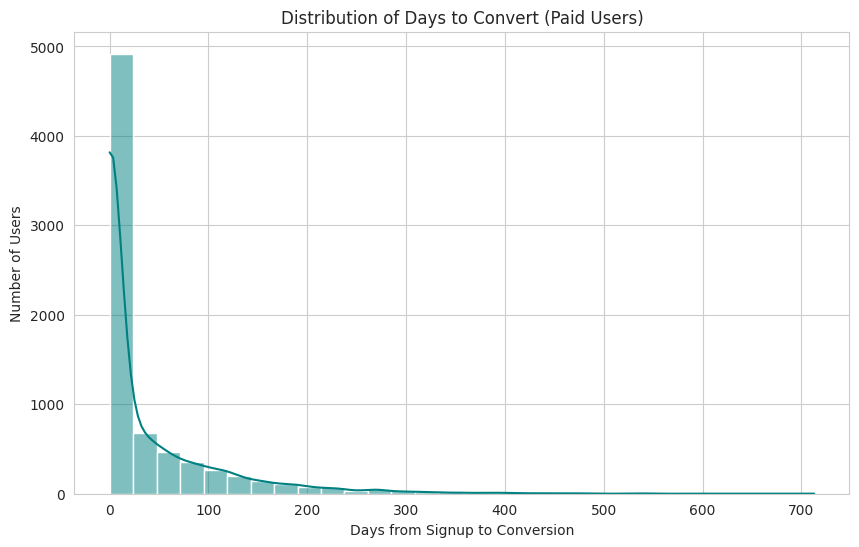

In [ ]:
converted_users = data[data['converted'] == 1]

plt.figure(figsize=(10,6))
sns.histplot(converted_users['days_to_convert'], bins=30, kde=True, color='teal')
plt.title('Distribution of Days to Convert (Paid Users)')
plt.xlabel('Days from Signup to Conversion')
plt.ylabel('Number of Users')
plt.show()

25% to 50% of all paid users upgraded the same day they signed up. 75% of users took 1.5 months to get converted. Some users upgraded after 2 years.

/tmp/ipython-input-3998979453.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




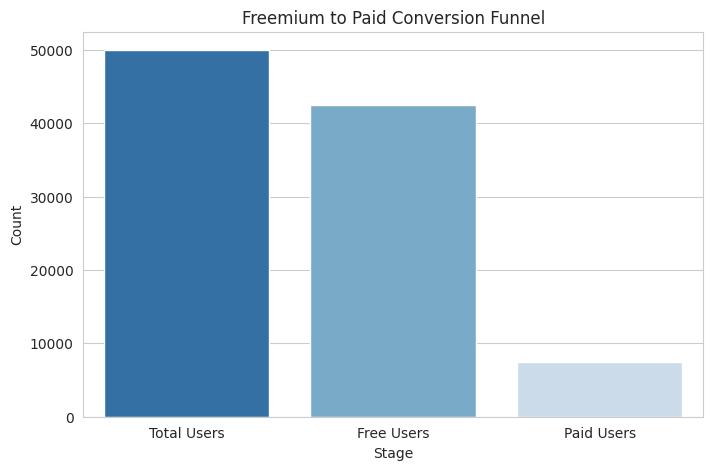

In [ ]:
#Brief view of conversion funnel
funnel_data = {
    'Stage': ['Total Users', 'Free Users', 'Paid Users'],
    'Count': [len(data), len(data[data['converted']==0]), len(data[data['converted']==1])]
}
funnel_df = pd.DataFrame(funnel_data)

plt.figure(figsize=(8,5))
sns.barplot(data=funnel_df, x='Stage', y='Count', palette='Blues_r')
plt.title('Freemium to Paid Conversion Funnel')
plt.show()


**Executive Summary -**
The conversion from free to paid is highest among Business users and developers indicating a high potential for market growth. AI has cause considerable disruption and innovation in the market and the company could use it to their advantage to find new online users within these two markets offering industry specializing services along with AI intergration courses whilst trying to introduce budget-friendly plans for job seekers, students and General users. Considering the wide use of AI Chatbot services globally, it could scale its business optimizing its business model from offering services that suit best today's need.

Average free users fall between 2 to 3 hours for free users and 5 to 6 hours on monthly basis for paid users. The outliers in this analysis are worth investigating further as they stand statistically significant. AI Companion and Chatbot services in offering services widely explored by students and it's worth finding.


With the limited scope of this dataset, it is not possible to move ahead with the mentioned suggestions. However, it is easy to articulate and analyze it on current business models.

SkillMinds AI could bring in potential revenue for the company if they implement plans that are budget-friendly to the customers or premium services. They could introduce a badge system for frequent users and offer a free course from a list of options. SkillMinds AI could also survey the outliers to put forward a plan that benefits both the customer and the business.

\